<a href="https://colab.research.google.com/github/douglascdsantos/alura_data-science-introducao-a-testes-estatisticos-com-python/blob/main/data_science_introducao_a_testes_estatisticos_com_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import  pandas  as  pd
import  seaborn as  sns
import  json
import  zipfile
import  requests
import  io

# Conhecendo os dados e explorando

## TMDB 5K

(x) carregando o csv

(x) describe

(x) histograma

(x) explorar coluans que possuim lista de valores

(x) explorar incoerências: média de notas zero

(x) tirar casos com < 10 votos -> tirando extremos


In [24]:
# carregando csv

url = "https://github.com/douglascdsantos/alura_data-science-introducao-a-testes-estatisticos-com-python/raw/main/archive.zip"

response = requests.get(url)

zip_file = zipfile.ZipFile(io.BytesIO(response.content))

df = pd.read_csv(zip_file.open('tmdb_5000_movies.csv'), dtype = {'id':str})

In [25]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [26]:
df.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


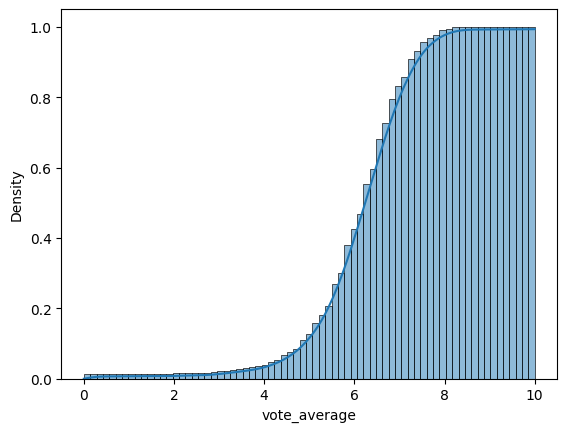

In [27]:
sns.histplot(df['vote_average'], stat = 'density', cumulative = True, kde=True);

In [28]:
df_limpo = df.query('vote_count >= 10').copy()

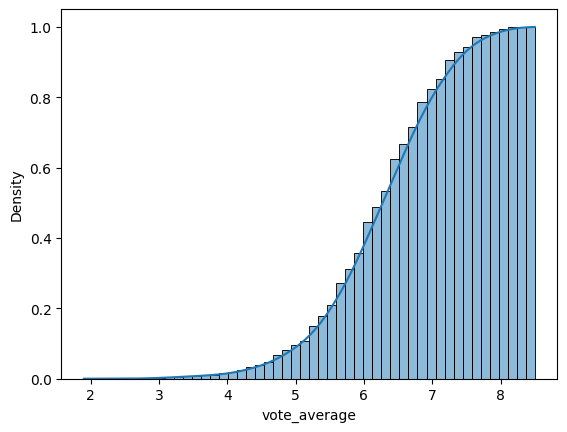

In [29]:
sns.histplot(df_limpo['vote_average'], stat = 'density', cumulative = True, kde=True);

In [30]:
def tratar_listas(valor):
    return json.loads(valor)

for col in ['genres', 'keywords', 'production_companies', 'production_countries', 'spoken_languages']:
  df_limpo[col] = df_limpo[col].apply(tratar_listas)

In [31]:
f_genero = pd.DataFrame(
    [(df_limpo.iloc[i,3], genero['id'], genero['name']) for i in range(df_limpo.shape[0]) for genero in df_limpo.iloc[i,1]],
    columns = ('movie_id', 'genre_id', 'genre')
    )
f_genero

,movie_id,genre_id,genre
0,19995,28,Action
1,19995,12,Adventure
2,19995,14,Fantasy
3,19995,878,Science Fiction
4,285,12,Adventure
...,...,...,...
11360,14337,53,Thriller
11361,9367,28,Action
11362,9367,80,Crime
11363,9367,53,Thriller


In [32]:
df.query("vote_count <= 10").describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.450000e+02,445.000000,4.450000e+02,444.000000,445.000000,445.000000
mean,1.408358e+06,0.663180,6.453687e+05,90.972973,4.722697,4.379775
std,4.405295e+06,0.884086,2.782905e+06,30.398767,2.371272,3.255217
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.092562,0.000000e+00,86.000000,3.800000,1.000000
50%,0.000000e+00,0.367312,0.000000e+00,94.000000,5.300000,4.000000
75%,6.000000e+04,0.887821,0.000000e+00,103.000000,6.300000,7.000000
max,4.600000e+07,6.574285,2.700000e+07,200.000000,10.000000,10.000000


<Axes: ylabel='vote_average'>

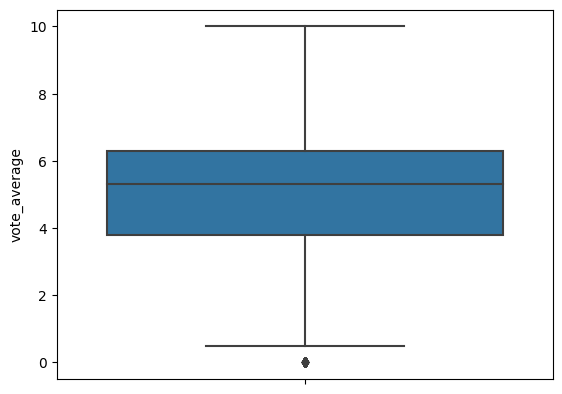

In [33]:
sns.boxplot(y = df.query("vote_count <= 10").vote_average)

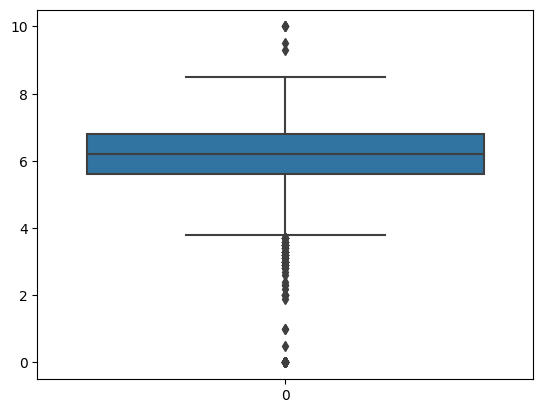

In [34]:
sns.boxplot(df.vote_average);

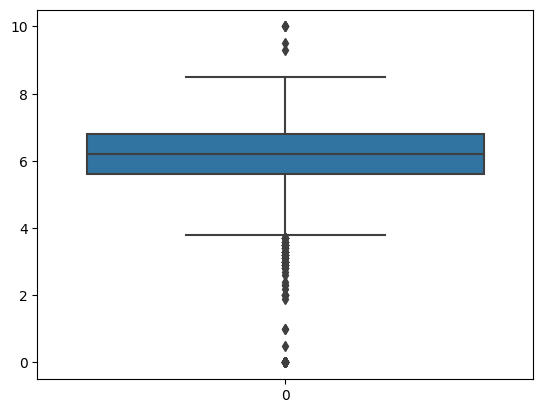

In [35]:
sns.boxplot(df.vote_average);

## Movielens

(x) reconstruir médias e filtros como temos no TMDB

In [36]:
# carregando csv

url = "https://github.com/douglascdsantos/alura_data-science-introducao-a-testes-estatisticos-com-python/raw/main/ml-latest-small.zip"

response = requests.get(url)

zip_file = zipfile.ZipFile(io.BytesIO(response.content))
filmes = pd.read_csv(zip_file.open('ml-latest-small/movies.csv'))
notas = pd.read_csv(zip_file.open('ml-latest-small/ratings.csv'))

In [37]:
nota_media_dos_filmes = notas.groupby('movieId').mean()['rating']

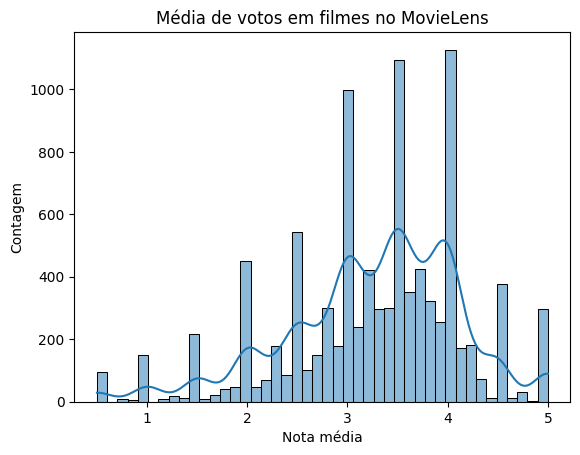

In [38]:
ax = sns.histplot(nota_media_dos_filmes, kde= True)
ax.set(xlabel = 'Nota média', ylabel = 'Contagem', title = 'Média de votos em filmes no MovieLens');

In [39]:
contagem_de_votos_por_filme = notas.groupby('movieId').count()['rating'].to_frame()
contagem_de_votos_por_filme

,rating
movieId,
1,215
2,110
3,52
4,7
5,49
...,...
193581,1
193583,1
193585,1


In [40]:
filmes_com_pelo_menos_10_votos = contagem_de_votos_por_filme.query('rating >= 10').index.values
filmes_com_pelo_menos_10_votos

array([     1,      2,      3, ..., 177765, 179819, 187593])

In [41]:
nota_media_dos_filmes_com_pelo_menos_10_votos = nota_media_dos_filmes.loc[filmes_com_pelo_menos_10_votos]
nota_media_dos_filmes_com_pelo_menos_10_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

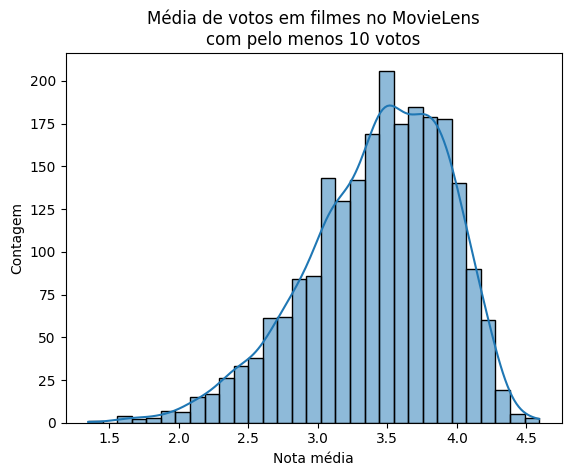

In [42]:
ax = sns.histplot(nota_media_dos_filmes_com_pelo_menos_10_votos, kde= True)
ax.set(
    xlabel = 'Nota média',
    ylabel = 'Contagem',
    title = 'Média de votos em filmes no MovieLens\ncom pelo menos 10 votos'
    );

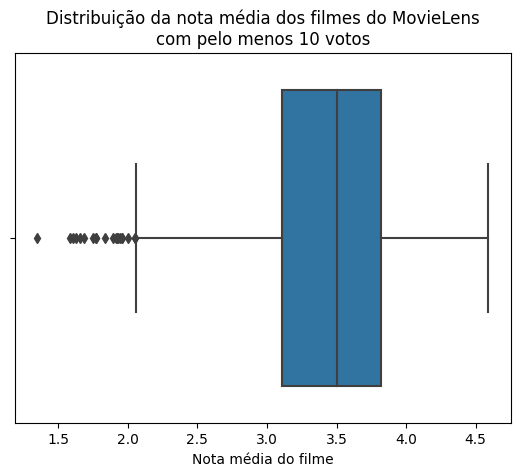

In [43]:
ax = sns.boxplot(x= nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(
    xlabel = 'Nota média do filme',
    #ylabel = 'Contagem',
    title = 'Distribuição da nota média dos filmes do MovieLens\ncom pelo menos 10 votos'
    );

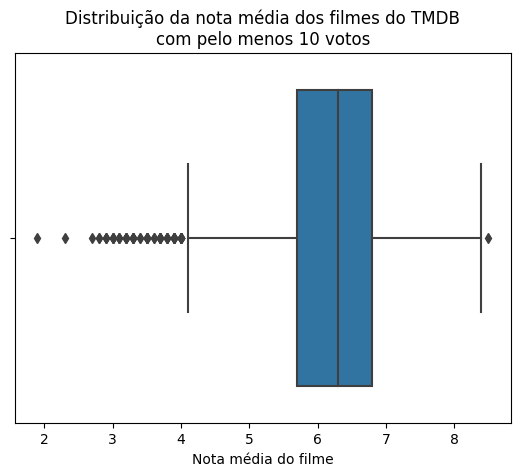

In [60]:

ax = sns.boxplot(x= df_limpo['vote_average'].values)
ax.set(
    xlabel = 'Nota média do filme',
    #ylabel = 'Contagem',
    title = 'Distribuição da nota média dos filmes do TMDB\ncom pelo menos 10 votos'
    );

# Analisando a distribuição das amostras

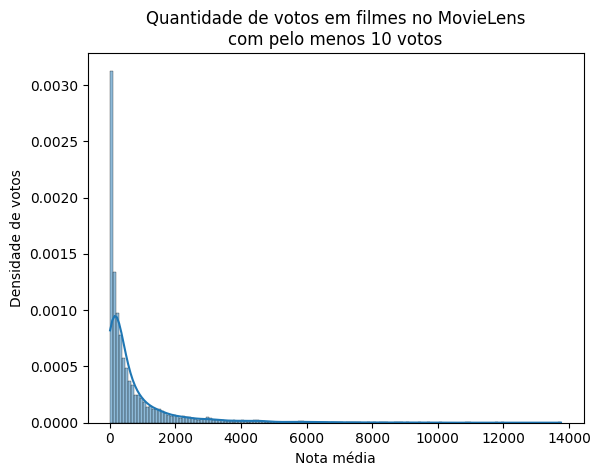

In [74]:
ax = sns.histplot(
    df_limpo.vote_count,
    #cumulative = True,
    stat = 'density',
    kde= True
    )
ax.set(
    xlabel = 'Nota média',
    ylabel = 'Densidade de votos',
    title = 'Quantidade de votos em filmes no MovieLens\ncom pelo menos 10 votos'
    );

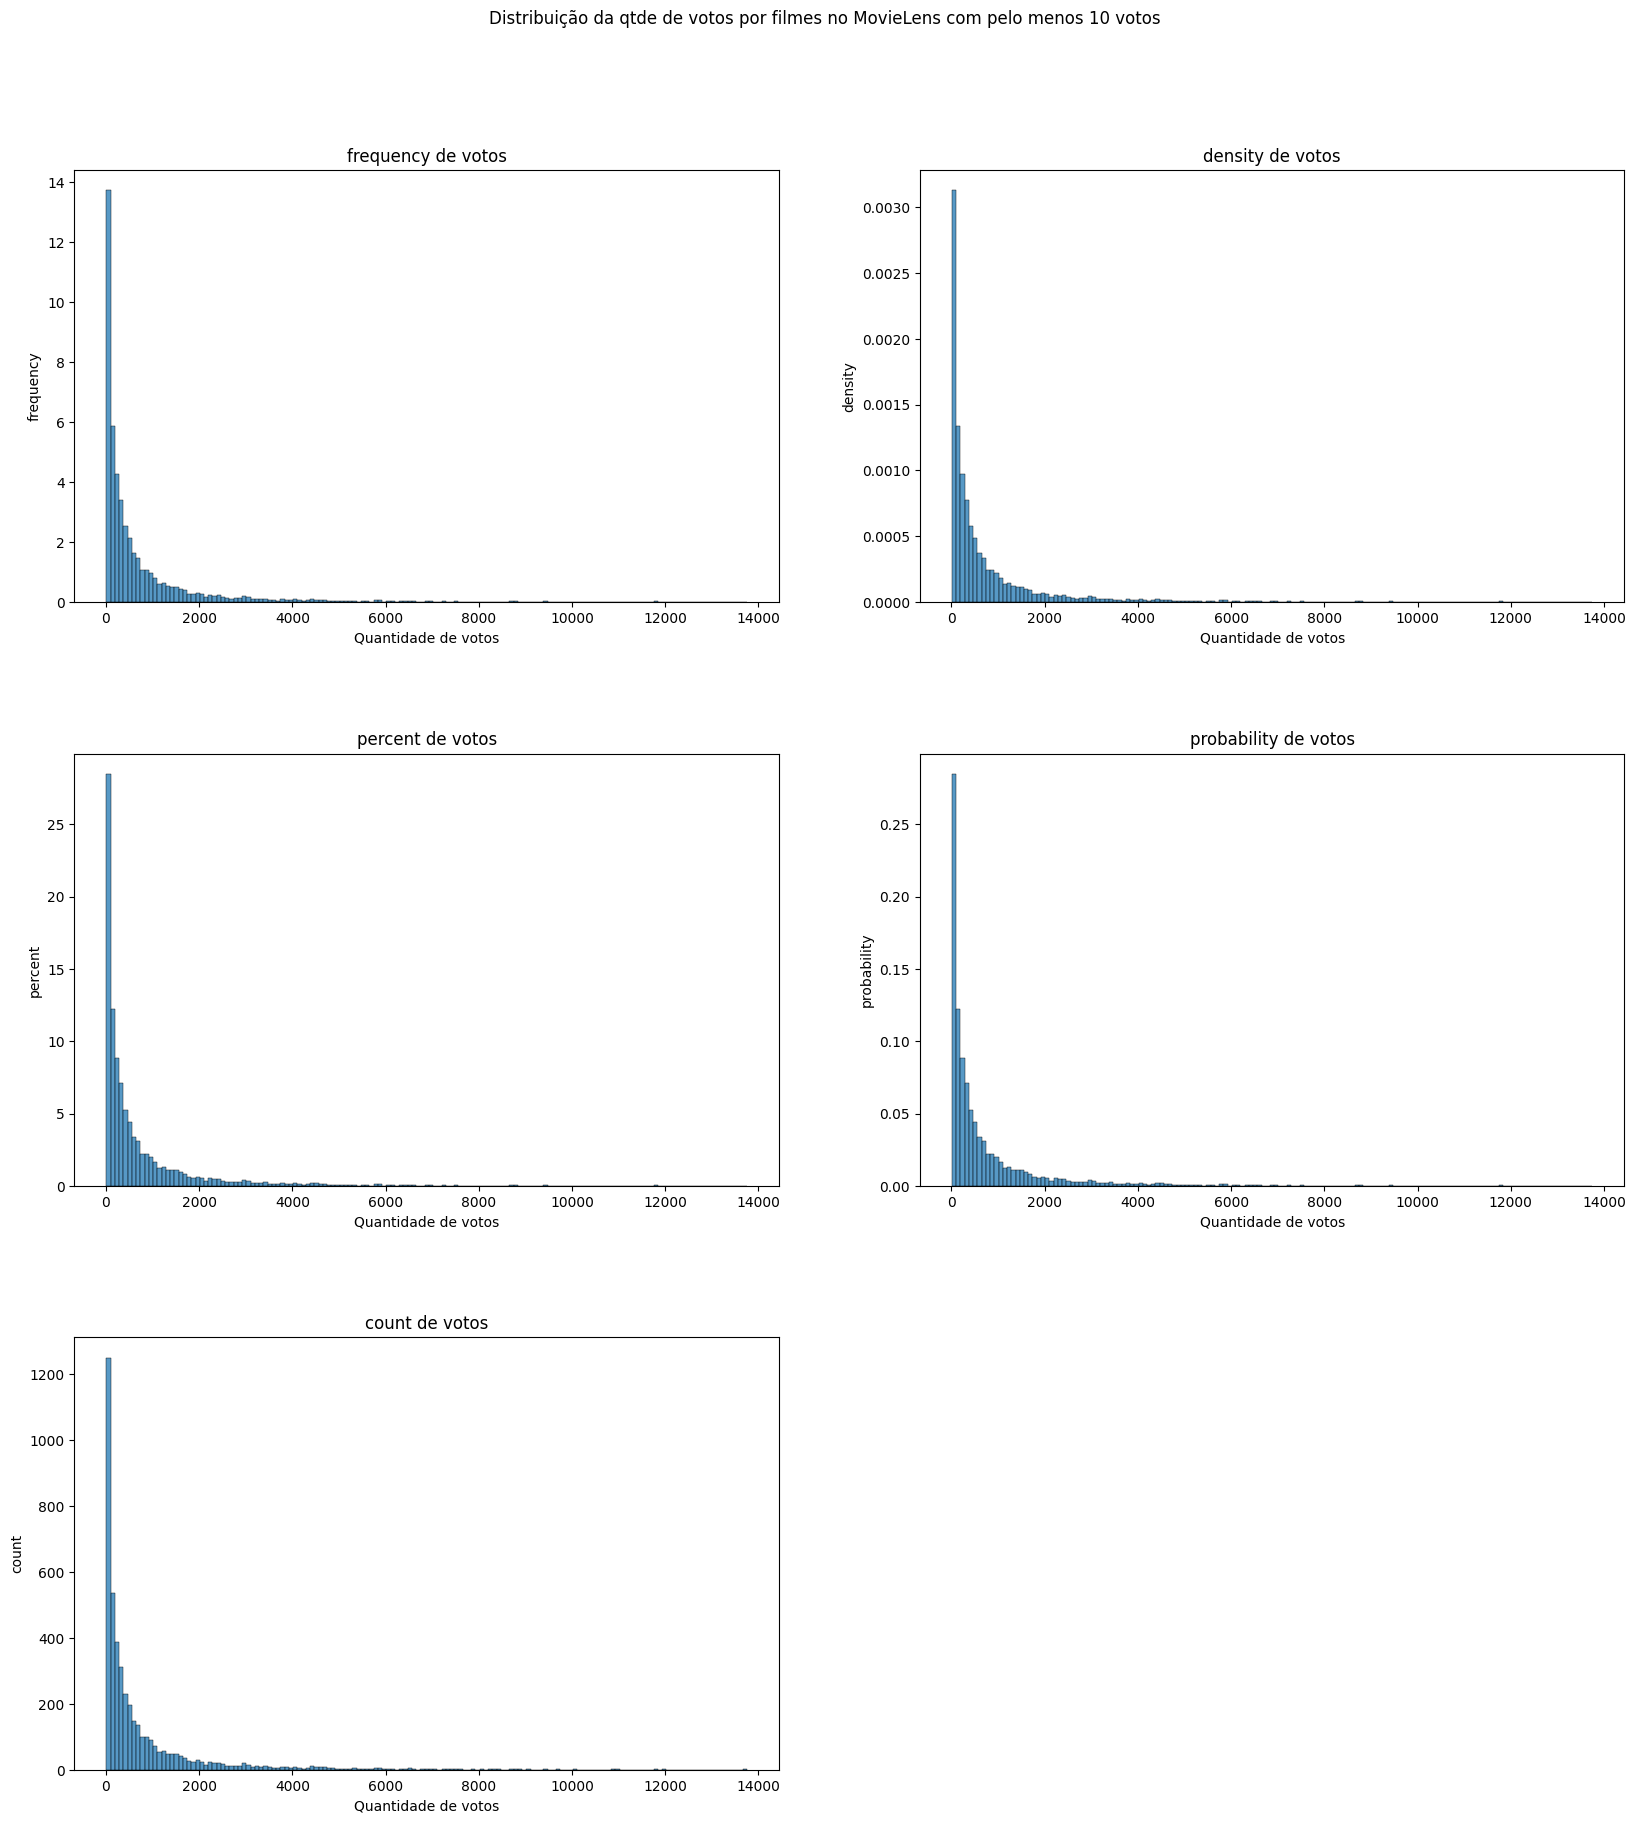

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize = ((20, 20)))
for k,stat in enumerate(['frequency', 'density','percent', 'probability', 'count']):
  plt.subplot(3, 2, k+1)
  ax = sns.histplot(
      df_limpo.vote_count,
      #cumulative = True,
      stat = stat,
      #kde= True
      )
  ax.set(
      xlabel = 'Quantidade de votos',
      ylabel = stat,
      title = f'{stat} de votos'
      )
plt.suptitle("Distribuição da qtde de votos por filmes no MovieLens com pelo menos 10 votos", fontsize = 12)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.show()

In [108]:
df_limpo = df_limpo.query('budget != 0').copy()
df_limpo.budget.describe()

count    3.648000e+03
mean     3.809945e+07
std      4.289965e+07
min      1.000000e+00
25%      9.500000e+06
50%      2.500000e+07
75%      5.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

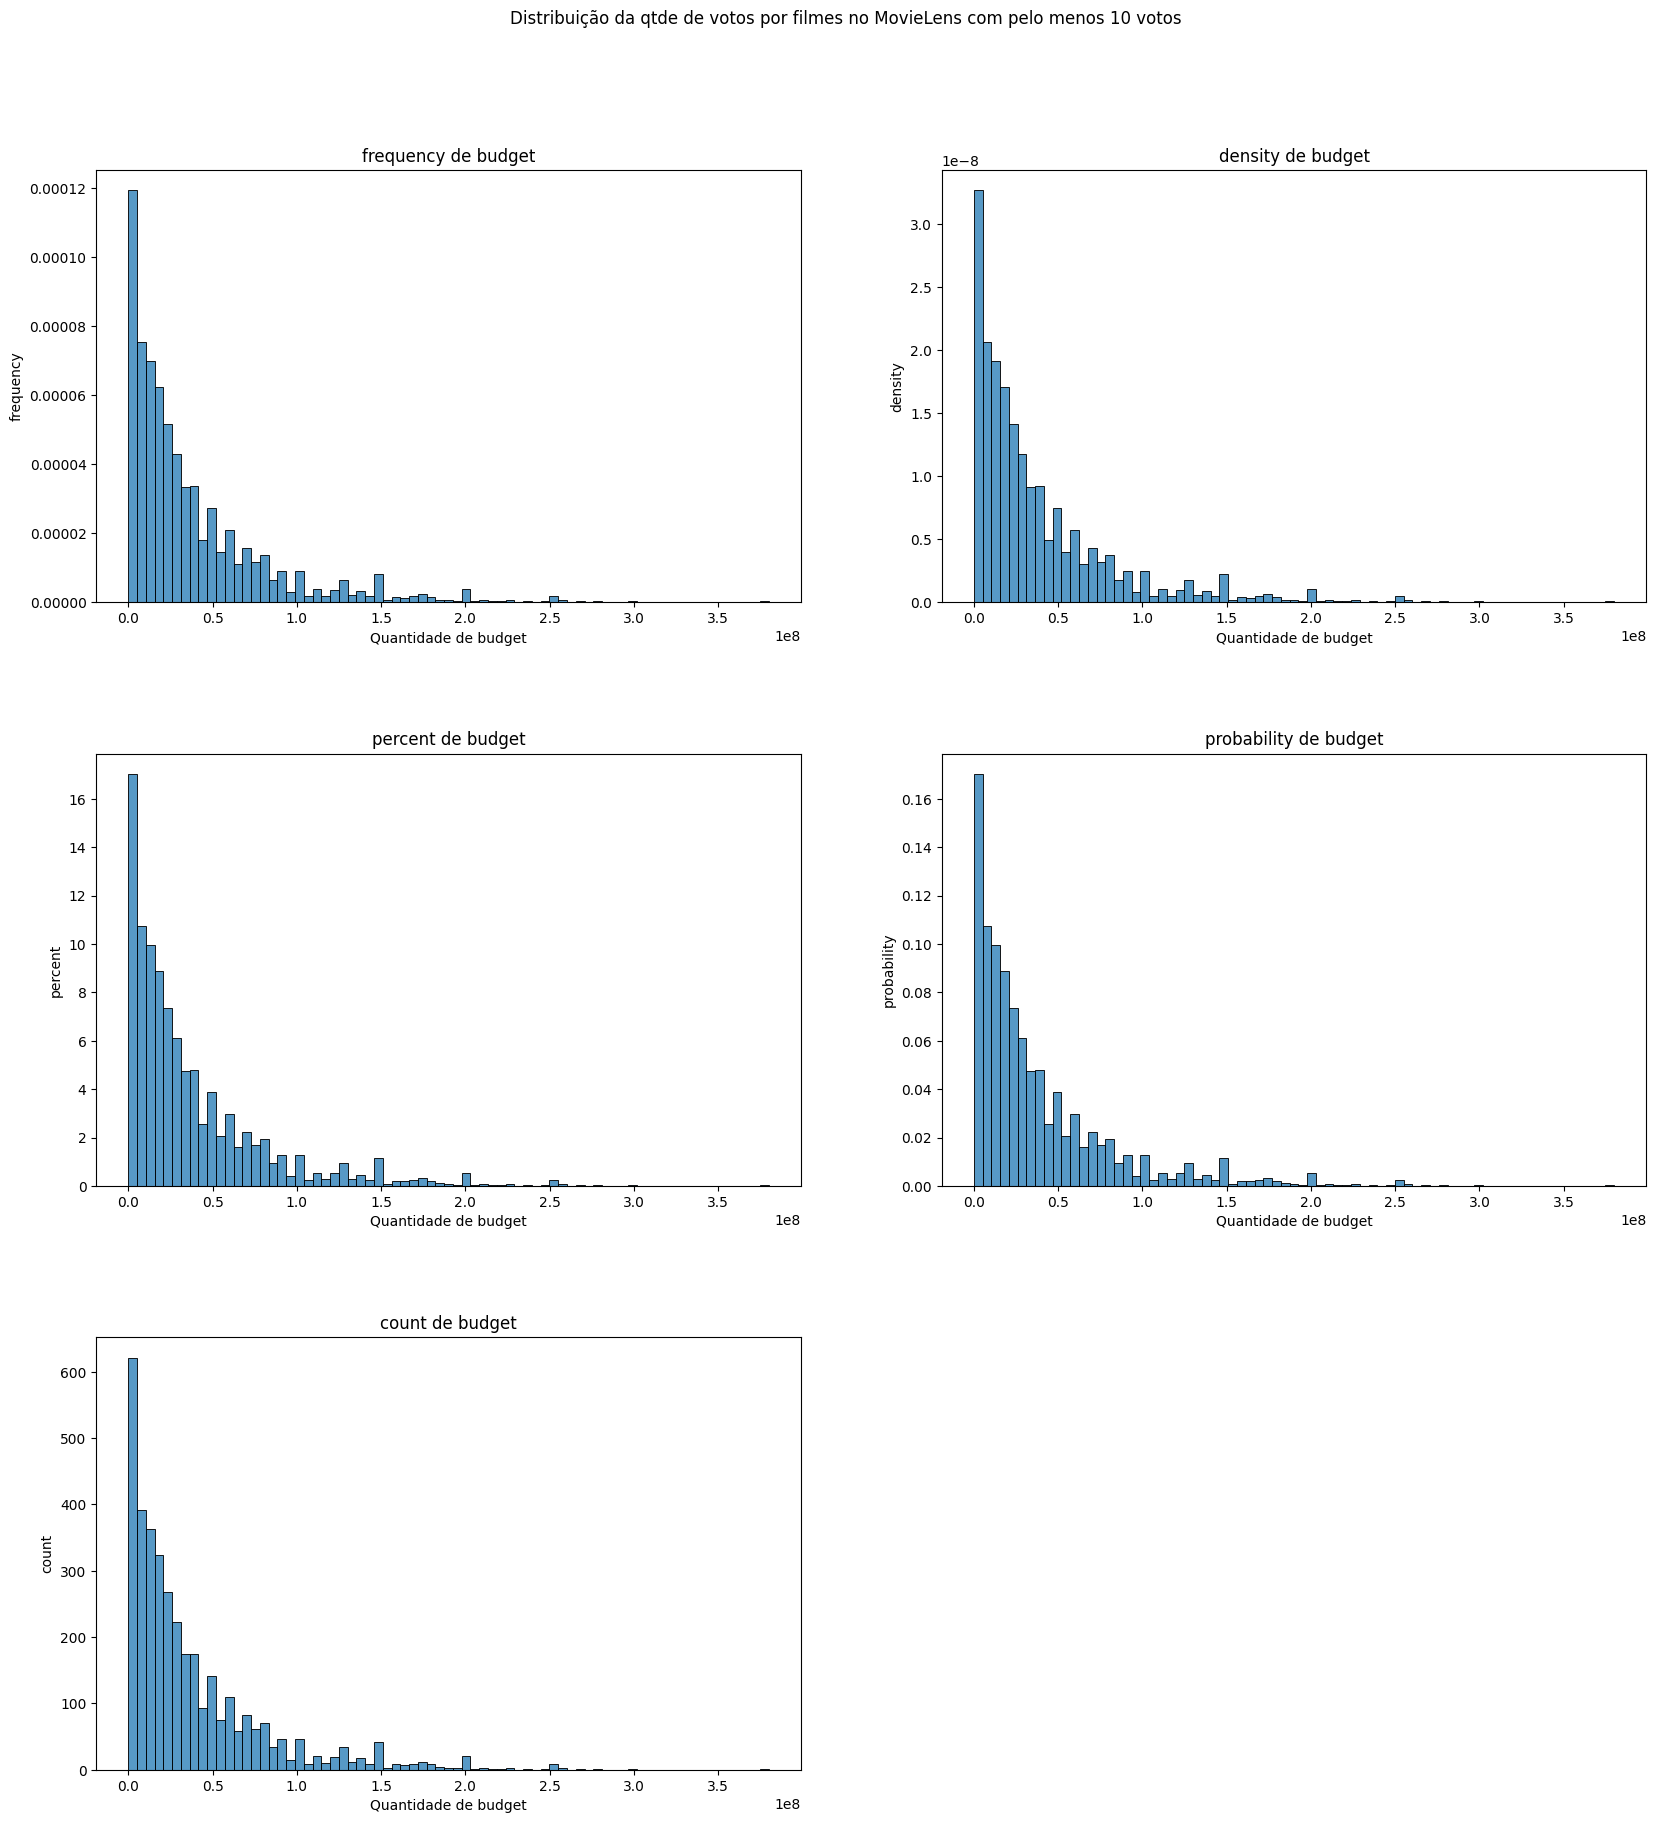

In [110]:
plt.figure(figsize = ((20, 20)))
for k,stat in enumerate(['frequency', 'density','percent', 'probability', 'count']):
  plt.subplot(3, 2, k+1)
  ax = sns.histplot(
      df_limpo.budget,
      #cumulative = True,
      stat = stat,
      #kde= True
      )
  ax.set(
      xlabel = 'Quantidade de budget',
      ylabel = stat,
      title = f'{stat} de budget'
      )
plt.suptitle("Distribuição da qtde de votos por filmes no MovieLens com pelo menos 10 votos", fontsize = 12)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.show()

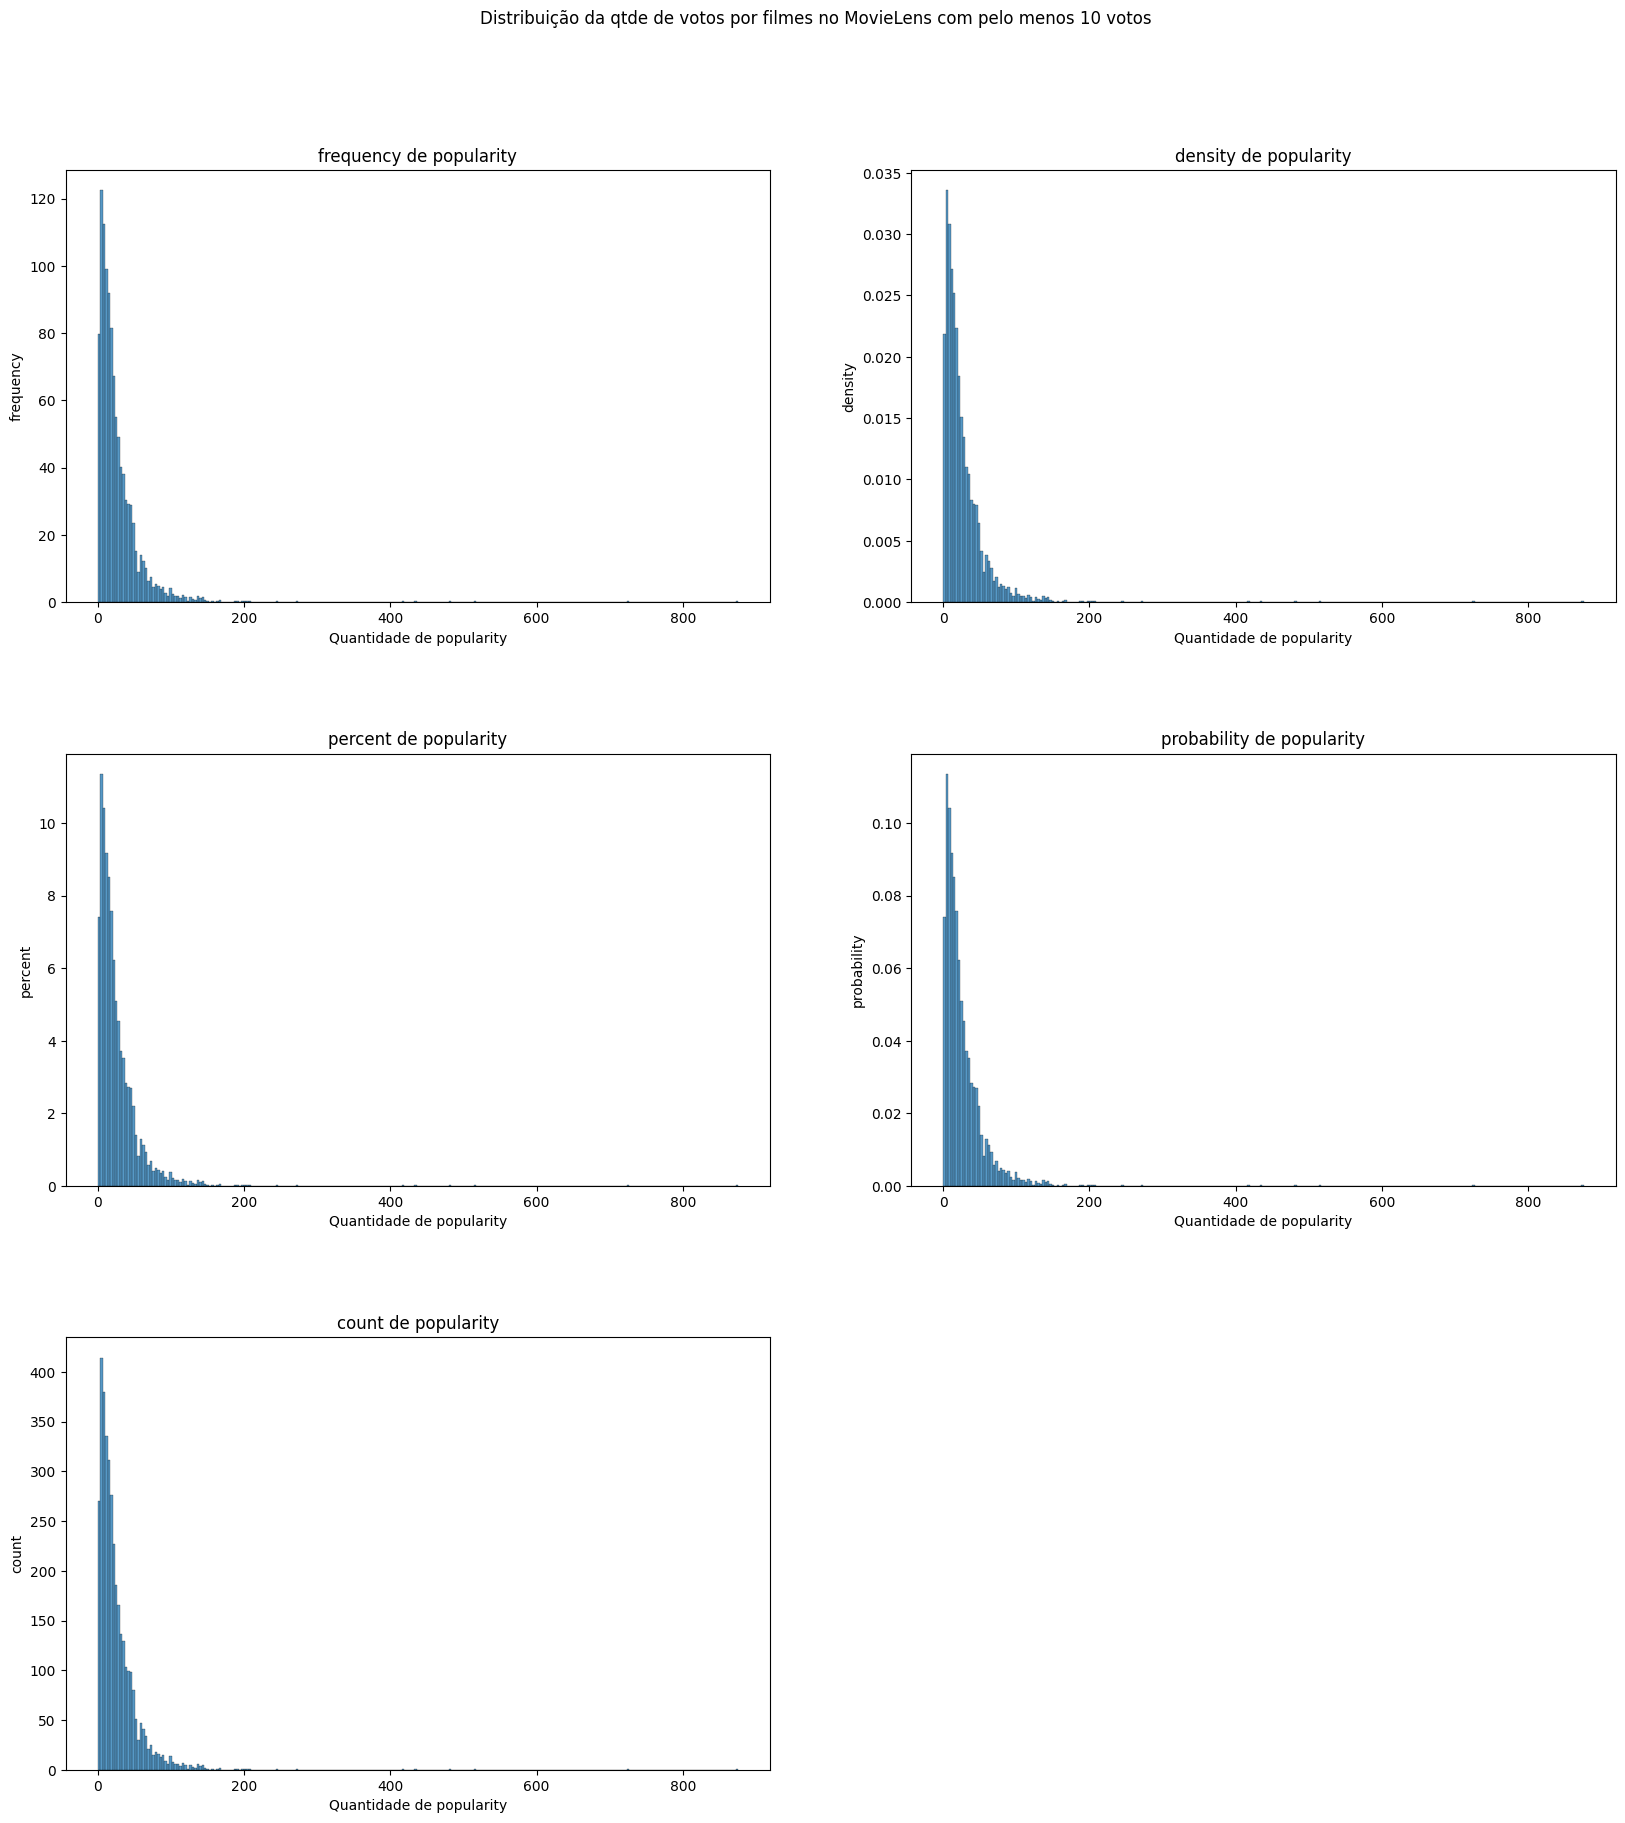

In [116]:
plt.figure(figsize = ((20, 20)))
for k,stat in enumerate(['frequency', 'density','percent', 'probability', 'count']):
  plt.subplot(3, 2, k+1)
  ax = sns.histplot(
      df_limpo.popularity,
      #cumulative = True,
      stat = stat,
      #kde= True
      )
  ax.set(
      xlabel = 'Quantidade de popularity',
      ylabel = stat,
      title = f'{stat} de popularity'
      )
plt.suptitle("Distribuição da qtde de votos por filmes no MovieLens com pelo menos 10 votos", fontsize = 12)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.show()

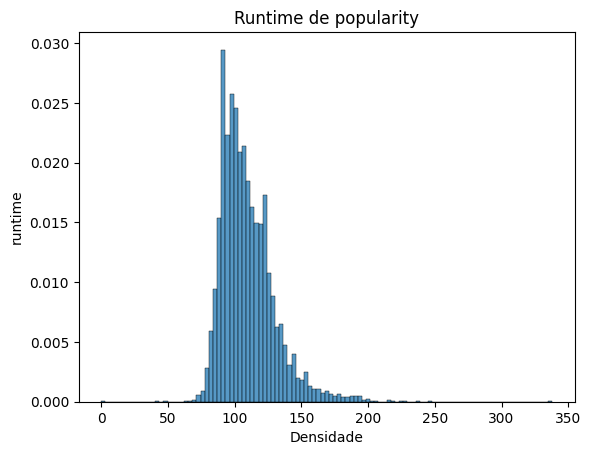

In [132]:
  ax = sns.histplot(
      df_limpo.runtime,
      cumulative = True,
      stat = 'density',
      kde= True
      )
  ax.set(
      xlabel = 'Tempo de duração',
      ylabel = 'Densidade',
      title = 'Runtime de popularity'
      );

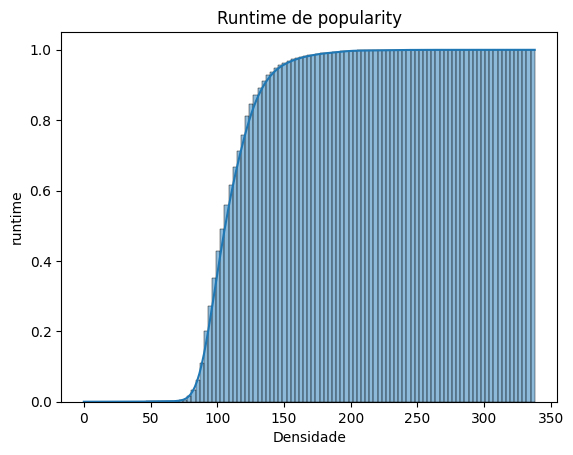

In [130]:
  ax = sns.histplot(
      df_limpo.runtime,
      cumulative = True,
      stat = 'density',
      kde= True
      )
  ax.set(
      xlabel = 'Tempo de duração',
      ylabel = 'Densidade',
      title = 'Runtime de popularity'
      );